# Deciding on Data Sources

I decided to select data from the 2011 census for religion, the 2016 Brexit Referendum, the 2019 UK general election and the most recent population estimates for 2019.  

As data for any kind of election is only available at an electorate level (and not lower) I decided to compile all of my data at that level. 

### BREXIT REFERENDUM DATA

This was pretty straightforward, as it was provided as two PDFs(result by constituency and turnout by constituency).
I loaded them both into Tableau and converted them each into an xls. 
NB. You cannot just convert PDFs so easily into DFs in Pandas (at least that is what my research told me)

No cleaning was needed. 

This is the original source:
http://www.eoni.org.uk/getmedia/50595cd6-0ed8-410f-a7ee-75b46c32045d/EU-REFERENDUM-2016-CONSTITUENCY-COUNT-TOTALS_1


### MID YEAR POPULATION DATA

This was provided in an xls format and was very easy to work with. 

NISRA calculate the population of NI for every year of Age until 90 (after 90 it is aggregated) and so I was able to use this as a comparison baseline for all 3 years of my exploration (2011, 2016 and 2019). 

I didn't need to clean this data, but I did create an aggregation where I separated the population into <18 and >=18.
I was then able to use the >=18 figure as a baseline to calculate %turnout in comparison to the total population. 


This is the original source:
https://www.nisra.gov.uk/publications/2019-mid-year-population-estimates-northern-ireland

### 2019 GENERAL ELECTION

This data wasprovided on Electoral Office of Northern Ireland's (EONI) website, BUT, not in an easy accessible format. 

There is a general landing page for the election here: http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-2019-Results
Each individual electorate, however, was stored on a separate webpage. 

I decided to scrape EONI's site to get the data of each individual electorate. 

#### Below are the libraries and modules I will may need. `requests`,  `BeautifulSoup` and `pandas`. 


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

#### Getting the website 


In [18]:
url = 'http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-2019-Results'

In [19]:
response = requests.get(url)
response.status_code

200

In [20]:
uk_election_2019_text = requests.get(url).text

In [21]:
soup = BeautifulSoup(uk_election_2019_text, parser="html5lib")

In [22]:
uk_elect_results_2019 = soup.select("#container > div.two-column-content.clearfix > div > div.right-column.cms > div > ul > li a")

In [23]:
uk_elect_results_2019

[<a href="/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-East">Belfast East</a>,
 <a href="/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-Nort">Belfast North</a>,
 <a href="/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-Sout">Belfast South</a>,
 <a href="/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-West">Belfast West</a>,
 <a href="/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-East-Antrim">East Antrim</a>,
 <a href="/Elections/Election-results-and-statistics/Election-results-and-statistics-

#### Cleaning the Urls and appending the main website to the front of each link

In [24]:
list_urls_2019_cons = []

for url in uk_elect_results_2019:
    list_urls_2019_cons.append(url["href"])

In [25]:
list_urls_2019_cons

['/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-East',
 '/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-Nort',
 '/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-Sout',
 '/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-West',
 '/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-East-Antrim',
 '/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-East-Londond',
 '/Elections/Election-results-and-statistics/Election

In [26]:
list_urls_2019_cons
beg_url = 'http://www.eoni.org.uk'
complete_list_urls_2019_cons = [beg_url + x for x in list_urls_2019_cons]
print (complete_list_urls_2019_cons)

['http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-East', 'http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-Nort', 'http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-Sout', 'http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-Belfast-West', 'http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-Result-2019-East-Antrim', 'http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-on

#### Turning each table into a pandas DF

In [27]:
electorate_result = []

for url in complete_list_urls_2019_cons:
    electorate_result.append(pd.read_html(url, header=0)[0])
    

In [28]:
belfast_east = electorate_result[0]
belfast_north = electorate_result[1]
belfast_south = electorate_result[2]
belfast_west = electorate_result[3]
east_antrim = electorate_result[4]
east_londonderry = electorate_result[5]
fermanagh_and_south_tyrone = electorate_result[6]
foyle = electorate_result[7]
lagan_valley = electorate_result[8]
mid_ulster = electorate_result[9]
newry_and_armagh = electorate_result[10]
north_antrim = electorate_result[11]
north_down = electorate_result[12]
south_antrim = electorate_result[13]
south_down = electorate_result[14]
strangford = electorate_result[15]
upper_bann = electorate_result[16]
west_tyrone = electorate_result[17]

In [29]:
west_tyrone

,Candidate,Description,Votes Polled
0,Órfhlaith Begley,Sinn Féin,16544
1,Thomas Buchanan,Democratic Unionist Party - D.U.P.,9066
2,Stephen Donnelly,Alliance Party,3979
3,Susan Glass,Green Party Northern Ireland,521
4,James Hope,Aontú,972
5,Daniel Christopher McCrossan,SDLP (Social Democratic & Labour Party),7330
6,Andy McKane,Ulster Unionist Party,2774


In [30]:
#keeping this as an easy access tool, so that I can access the names whenever I need them. 

belfast_east
belfast_north 
belfast_south
belfast_west 
east_antrim 
east_londonderry 
fermanagh_and_south_tyrone 
foyle 
lagan_valley
mid_ulster 
newry_and_armagh
north_antrim 
north_down 
south_antrim
south_down 
strangford 
upper_bann 
west_tyrone 



,Candidate,Description,Votes Polled
0,Órfhlaith Begley,Sinn Féin,16544
1,Thomas Buchanan,Democratic Unionist Party - D.U.P.,9066
2,Stephen Donnelly,Alliance Party,3979
3,Susan Glass,Green Party Northern Ireland,521
4,James Hope,Aontú,972
5,Daniel Christopher McCrossan,SDLP (Social Democratic & Labour Party),7330
6,Andy McKane,Ulster Unionist Party,2774


##### Combining all 18 DFs into one XLS Workbook, but on 18 different sheets. 

I thought that it might be useful to save this data on individual worksheets, in case I or someone else would want to look at each electorate individually. 

In [14]:
writer = pd.ExcelWriter('/Users/williammollers/Desktop/DATA_ANALYTICS/IRONHACK/CLASS/PROJECTS/FINAL_PROJECT/NORTHERN_IRELAND/TABLES_I_AM_USING/MY_ADDITIONS/UK_2019_results_electorate/ni_uk_election__electorate_19.xlsx', engine='xlsxwriter')

In [15]:
# Write each dataframe to a different worksheet.
belfast_east.to_excel(writer, sheet_name='belfast_east')
belfast_north.to_excel(writer, sheet_name='belfast_north')
belfast_south.to_excel(writer, sheet_name='belfast_south')
belfast_west.to_excel(writer, sheet_name='belfast_west')
east_antrim.to_excel(writer, sheet_name='east_antrim')
east_londonderry.to_excel(writer, sheet_name='east_londonderry')
fermanagh_and_south_tyrone.to_excel(writer, sheet_name='fermanagh_and_south_tyrone')
foyle.to_excel(writer, sheet_name='foyle')
lagan_valley.to_excel(writer, sheet_name='lagan_valley')
mid_ulster.to_excel(writer, sheet_name='mid_ulster')
newry_and_armagh.to_excel(writer, sheet_name='newry_and_armagh')
north_antrim.to_excel(writer, sheet_name='north_antrim')
north_down.to_excel(writer, sheet_name='north_down')
south_antrim.to_excel(writer, sheet_name='south_antrim')
south_down.to_excel(writer, sheet_name='south_down')
strangford.to_excel(writer, sheet_name='strangford')
upper_bann.to_excel(writer, sheet_name='upper_bann')
west_tyrone.to_excel(writer, sheet_name='west_tyrone')


# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Now I want one single DF that has all the parties and all the results in the different electorates listed. 

For my analysis I want all of the above info in one DF. 

##### My goals for the next stage of wrangling are as follows:

* Drop the candidates(I don't need information on the individual candidates).
* Make all of the columns lower case.
* Rename the Votes Polled column after the electorate. 
* To make sure that I don't have issues with the names, I will create a dictionary, so that I can refer to the names from it. 

In [31]:
#First step here is to create a list of all of the DFs

all_electorates_df_list = [belfast_east,
belfast_north, 
belfast_south,
belfast_west, 
east_antrim, 
east_londonderry, 
fermanagh_and_south_tyrone, 
foyle, 
lagan_valley,
mid_ulster, 
newry_and_armagh,
north_antrim, 
north_down, 
south_antrim,
south_down, 
strangford, 
upper_bann, 
west_tyrone]

In [32]:
len(all_electorates_df_list)

18

In [33]:
#to test that it works 
all_electorates_df_list[0]

,Candidate,Description,Votes Polled
0,Naomi Long,Alliance Party,19055
1,Carl Christian McClean,Ulster Unionist Party,2516
2,Gavin Robinson,Democratic Unionist Party - D.U.P.,20874


In [35]:
#creating a dictionary of dfs and their individual names

electorate_dct = {
'belfast_east' : belfast_east, 
'belfast_north': belfast_north, 
'belfast_south' : belfast_south,
'belfast_west' : belfast_west, 
'east_antrim' : east_antrim, 
'east_londonderry' : east_londonderry, 
'fermanagh_and_south_tyrone' : fermanagh_and_south_tyrone, 
'foyle' : foyle, 
'lagan_valley' : lagan_valley,
'mid_ulster' : mid_ulster, 
'newry_and_armagh' : newry_and_armagh,
'north_antrim' : north_antrim, 
'north_down' : north_down, 
'south_antrim' : south_antrim,
'south_down' : south_down, 
'strangford' : strangford, 
'upper_bann' : upper_bann, 
'west_tyrone' : west_tyrone}

In [36]:
#function to rename the columns / make the columns lower case
def rename_column_as_real_electorate_name(df, new_name):
   df.rename(columns = {'Candidate':'candidate','Description':'party','Votes Polled':new_name}, inplace=True)

In [37]:
# apply the function to all electorate df's using the above dict and to drop the candidate column:
for name, df in electorate_dct.items():
   rename_column_as_real_electorate_name(df, name)
   df.drop(['candidate'], axis=1, inplace=True)

In [38]:
#to check that it works 

north_antrim

,party,north_antrim
0,SDLP (Social Democratic & Labour Party),2943
1,Sinn Féin,5632
2,Alliance Party,6231
3,Democratic Unionist Party - D.U.P.,20860
4,Independent,246
5,Ulster Unionist Party,8139


In [39]:
#now to check that this has transferred to my master list 

all_electorates_df_list

[                                party  belfast_east
 0                      Alliance Party         19055
 1               Ulster Unionist Party          2516
 2  Democratic Unionist Party - D.U.P.         20874,
                                 party  belfast_north
 0  Democratic Unionist Party - D.U.P.          21135
 1                           Sinn Féin          23078
 2                      Alliance Party           4824,
                                      party  belfast_south
 0                           Alliance Party           6786
 1  SDLP (Social Democratic & Labour Party)          27079
 2                    Ulster Unionist Party           1259
 3       Democratic Unionist Party - D.U.P.          11678
 4                                    Aontú            550,
                                      party  belfast_west
 0            People Before Profit Alliance          6194
 1                                    Aontú          1635
 2  SDLP (Social Democratic & Labour Part

In [40]:
#Here I want to merge all of the Dfs into one DF and for that I need a for loop

outer_merged_all = pd.DataFrame(columns=["party"])

for df in all_electorates_df_list:
    outer_merged_all = outer_merged_all.merge(df, how="outer", on=["party"])


In [41]:
outer_merged_all

,party,belfast_east,belfast_north,belfast_south,belfast_west,east_antrim,east_londonderry,fermanagh_and_south_tyrone,foyle,lagan_valley,mid_ulster,newry_and_armagh,north_antrim,north_down,south_antrim,south_down,strangford,upper_bann,west_tyrone
0,Alliance Party,19055.0,4824.0,6786.0,1882.0,10165.0,5921.0,2650.0,1267.0,13087.0,3526.0,4211.0,6231.0,18358.0,8190.0,6916.0,10634.0,6433.0,3979.0
1,Ulster Unionist Party,2516.0,NaN,1259.0,NaN,5475.0,3599.0,21929.0,1088.0,8606.0,2611.0,4204.0,8139.0,4936.0,12460.0,3307.0,4023.0,6197.0,2774.0
2,Democratic Unionist Party - D.U.P.,20874.0,21135.0,11678.0,5220.0,16871.0,15765.0,NaN,4773.0,19586.0,10936.0,11000.0,20860.0,15390.0,15149.0,7619.0,17705.0,20501.0,9066.0
3,Sinn Féin,NaN,23078.0,NaN,20866.0,2120.0,6128.0,21986.0,9771.0,1098.0,20473.0,20287.0,5632.0,NaN,4887.0,16137.0,555.0,12291.0,16544.0
4,SDLP (Social Democratic & Labour Party),NaN,NaN,27079.0,2985.0,902.0,6158.0,3446.0,26881.0,1758.0,6384.0,9449.0,2943.0,NaN,2288.0,14517.0,1994.0,4623.0,7330.0
5,Aontú,NaN,NaN,550.0,1635.0,NaN,1731.0,NaN,2032.0,NaN,NaN,1628.0,NaN,NaN,NaN,1266.0,NaN,NaN,972.0
6,People Before Profit Alliance,NaN,NaN,NaN,6194.0,NaN,NaN,NaN,1332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Green Party Northern Ireland,NaN,NaN,NaN,NaN,685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,790.0,NaN,521.0
8,Conservative and Unionist Party,NaN,NaN,NaN,NaN,1043.0,NaN,NaN,NaN,955.0,NaN,NaN,NaN,1959.0,NaN,NaN,1476.0,NaN,NaN
9,Independent,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,NaN,690.0,NaN,246.0,NaN,NaN,NaN,NaN,NaN,NaN


##### NaN Values

There are none values here. In this case, they are important, as not all parties campaigned in all electorates...

##### Exporting this all to excel

In [47]:
writer = pd.ExcelWriter('/Users/williammollers/Desktop/DATA_ANALYTICS/IRONHACK/CLASS/PROJECTS/FINAL_PROJECT/NORTHERN_IRELAND/TABLES_I_AM_USING/MY_ADDITIONS/UK_2019_results_electorate/ni_uk_19_all_electorates.xlsx', engine='xlsxwriter')

In [48]:
# Write each dataframe to a different worksheet.
outer_merged_all.to_excel(writer, sheet_name='all_uk_electorates_2019')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# CREATING DF FROM UK ELECTION TURNOUT 2019

An important part of my analysis will be to find any voters who had not voted in recent elections, as we want to target people who might not have voted. 

Therefore more web scraped is needed, as again, EONI does not provide the data in a spreadsheet format. 

Thankfully the turnout for 2019, was simply a table and with read_html, you can take anything that seems like a table and put that into a list of DFs. 


In [30]:
url = "http://www.eoni.org.uk/Elections/Election-results-and-statistics/Election-results-and-statistics-2003-onwards/Elections-2019/UK-Parliamentary-Election-2019-Turnout"

In [31]:
election_uk_19_turnout = pd.read_html(url, header=0)

In [32]:
election_uk_19_turnout= election_uk_19_turnout[0]

In [33]:
election_uk_19_turnout

,Constituency,Eligible Electorate,Votes Polled,Turnout (%)
0,Belfast East,66245,42619,64.34
1,Belfast North,72225,49425,68.43
2,Belfast South,69984,47527,67.91
3,Belfast West,65644,38988,59.39
4,East Antrim,64830,37431,57.74
5,East Londonderry,69246,39495,57.04
6,Fermanagh and South Tyrone,72848,51087,70.13
7,Foyle,74346,47370,63.72
8,Lagan Valley,75735,45589,60.20
9,Mid Ulster,70449,44968,63.83


In [34]:
election_uk_19_turnout.to_excel(r'/Users/williammollers/Desktop/DATA_ANALYTICS/IRONHACK/CLASS/PROJECTS/FINAL_PROJECT/NORTHERN_IRELAND/TABLES_I_AM_USING/MY_ADDITIONS/election_uk_19_turnout.xlsx', index = False)

# 2011 Census for Religion raised in 


From the Northern Ireland Statistics and Research Agency (NISRA) I have taken some data on the last census in 2011 on religion, with the specific title being: "Religion or Religion Brought Up In by Age LC2110NI"


This is the original source:
https://www.ninis2.nisra.gov.uk/Download/Census%202011/LC2110NI%20(a).zip

This data is provided in multiple different levels, from national down to ward. It was easy therefore to pick the electorate, which here is classified as AA. 

Unfortunately each electorate was in a separate xls workbook, but I only needed one line from each workbook (total population and the split of religions) 

I therefore decided to code a way to iterate over all 18 workbooks to extract the one line that I need. 

# ITERATING OVER FOLDER WITH 18 EXCEL FILES TO EXTRACT ONE ROW 

In [49]:
from glob import glob 

In [52]:
file_paths = glob("TABLES_I_AM_USING/Religion/AA/LC*.xlsx")
#Here I used regex to make sure that I captured all 18 folders

In [53]:
file_paths

['TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000007.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000011.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000010.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000006.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000001.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000017.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000016.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000015.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000003.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000002.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000014.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000018.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000013.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000005.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000009.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000008.xlsx',
 'TABLES_I_AM_USING/Religion/AA/LC2110NI_N06000004.xlsx',
 'TABLES_I_AM_

In [55]:
len(file_paths)
#to check the amount of files inside, should = 18


18

I now wanted to iterate over all of these files to extract the single line, but I also wanted to rename each row after the electorate code, which was kindly provided in the file name. 

In [56]:
import re
import os
religion_data_electorate = pd.DataFrame()

for filepath in file_paths:
    df = pd.read_excel(filepath, skiprows=6, nrows=1)
    file_name = os.path.basename(filepath)
    match = re.match(r'^.+_(.+)\..+$', file_name)
    df.insert(0, 'electorate_code',match.groups()[0])
    religion_data_electorate = religion_data_electorate.append(df,ignore_index=True)
    
#dropping was done here and not in the for loop, as I only need to drop the column once. 
religion_data_electorate.drop(['Unnamed: 0'], axis=1, inplace=True)

In [57]:
religion_data_electorate

,electorate_code,All usual residents,Catholic,Protestant and Other Christian (including Christian related),Other religions and none
0,N06000007,102553,59159,40100,3294
1,N06000011,112401,74591,34380,3430
2,N06000010,99155,66152,30522,2481
3,N06000006,99673,41564,53097,5012
4,N06000001,92221,11712,69533,10976
5,N06000017,118010,51919,58998,7093
6,N06000016,89370,15447,65353,8570
7,N06000015,108835,75384,29224,4227
8,N06000003,111402,49025,48630,13747
9,N06000002,102531,48126,46821,7584


In [58]:
#now I want to clean up all the column names (lowercase, reduce the length, etc)

In [59]:
religion_data_electorate.rename(columns = {'All usual residents':'all_resident','Catholic':'catholic',
                                'Protestant and Other Christian (including Christian related)':'protestant', 
                                'Other religions and none':'other'}, inplace=True)

In [60]:
religion_data_electorate

,electorate_code,all_resident,catholic,protestant,other
0,N06000007,102553,59159,40100,3294
1,N06000011,112401,74591,34380,3430
2,N06000010,99155,66152,30522,2481
3,N06000006,99673,41564,53097,5012
4,N06000001,92221,11712,69533,10976
5,N06000017,118010,51919,58998,7093
6,N06000016,89370,15447,65353,8570
7,N06000015,108835,75384,29224,4227
8,N06000003,111402,49025,48630,13747
9,N06000002,102531,48126,46821,7584


This looks quite clean, now time to export the data!

In [63]:
writer = pd.ExcelWriter('/Users/williammollers/Desktop/DATA_ANALYTICS/IRONHACK/CLASS/PROJECTS/FINAL_PROJECT/NORTHERN_IRELAND/TABLES_I_AM_USING/MY_ADDITIONS/religion/ni_electorate_religion_brought_up_in_2011.xlsx', engine='xlsxwriter')

In [64]:
# Write each dataframe to a different worksheet.
religion_data_electorate.to_excel(writer, sheet_name='religion_brought_up_in_2011')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# How realible is the data I have collected?
    

    
    


This is not an easy question to answer most times, but in this case I think it would be fair to say that my data quality is quite reliable, as it has all come from two reputable government sources. 

What this does not guarantee, however, is that any projections about the future would be correct. 

The main issue simply being that overall turnout relative to total population in the 2 elections I have analysed (most of this has been done in xls, as it is simply easier and most of the data was in that format), is only at around 60%. 

This means that any projections on a future referendum are being carried out without 40% of the population and therefore any conclusions should be treated with caution.  

# CORRELATION ANALYSIS

Despite these difficulties, I thought it would be interesting to see if there is any correlation between some of the aggregations I have made. 

All of the comparisons below are %. E.g. 13% Catholic means that 13% of the electorate is catholic. 

I have done this because it is impossible to compare absolute figures from different years. 

Therefore please note that these are broad generalisations and do no indicate whether or not someone voted Leave, Remain, Sinn Fein or DUP. 
What they do attempt to analyse is for example, where there are more catholics as a %, the % of people voting remain increased. 

### 1.  Religion and Brexit Vote 

Northern Ireland is a country traditionally seen as divided along sectarian (religious) lines and I wondered if that can be seen in the Brexit vote. 



In [55]:
df = pd.read_excel('TABLES_I_AM_USING/MY_ADDITIONS/CORRELATION_BREXIT_RELIGION.xlsx')

In [56]:
df

,Constituency,%_remain_total_eligible_pop,%_leave_total_eligible_pop,%_didnt_vote_elgible_pop,%_catholic,%_protestant,%_other_religion
0,Belfast East,0.285093,0.301460,0.413185,0.126999,0.753982,0.119018
1,Belfast North,0.253034,0.249464,0.497175,0.469380,0.456652,0.073968
2,Belfast South,0.354294,0.155587,0.489810,0.440073,0.436527,0.123400
3,Belfast West,0.319251,0.111840,0.568660,0.800789,0.166461,0.032750
4,East Antrim,0.269951,0.332494,0.397279,0.203870,0.701122,0.095007
5,East Londonderry,0.272126,0.250935,0.476810,0.417004,0.532712,0.050284
6,Fermanagh and South Tyrone,0.343173,0.242874,0.413599,0.576863,0.391017,0.032120
7,Foyle,0.407274,0.113111,0.479387,0.751247,0.220153,0.028599
8,Lagan Valley,0.277796,0.314420,0.407649,0.190207,0.719280,0.090512
9,Mid Ulster,0.324554,0.212876,0.462317,0.667157,0.307821,0.025021


In [57]:
df.corr()

,%_remain_total_eligible_pop,%_leave_total_eligible_pop,%_didnt_vote_elgible_pop,%_catholic,%_protestant,%_other_religion
%_remain_total_eligible_pop,1.000000,-0.785902,0.154457,0.646410,-0.675993,-0.370566
%_leave_total_eligible_pop,-0.785902,1.000000,-0.732317,-0.868952,0.905829,0.513865
%_didnt_vote_elgible_pop,0.154457,-0.732317,1.000000,0.676574,-0.702859,-0.413310
%_catholic,0.646410,-0.868952,0.676574,1.000000,-0.995244,-0.848080
%_protestant,-0.675993,0.905829,-0.702859,-0.995244,1.000000,0.792433
%_other_religion,-0.370566,0.513865,-0.413310,-0.848080,0.792433,1.000000


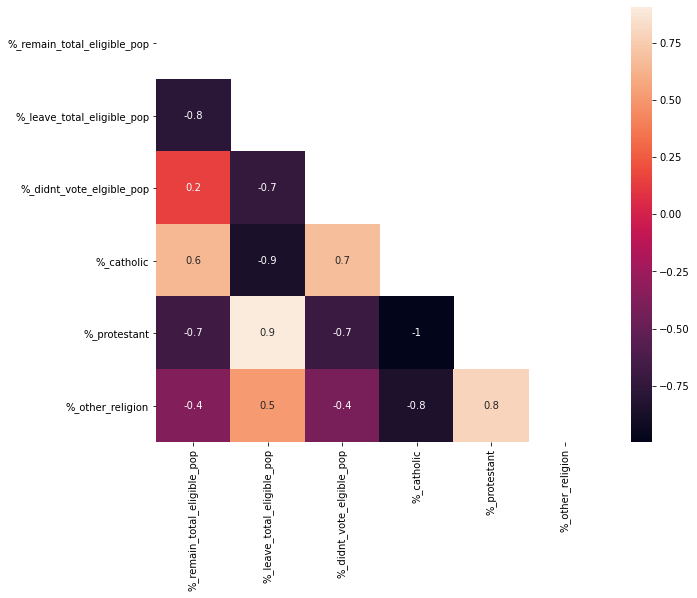

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1g')
plt.show()

### Possible Conclusions of Brexit v Religion
* Electorates with a high % Catholics(0.7) were far more likely to have a higher % of people not voting than electorates with a high % Protestants (-0.7) or a high % of Other religion (-0.4). 
* Electorates with a high % Catholics were more likely to have a higher % of remain votes (0.6)
* Electorates with a high % Protestants were more likely to have a higher % of leave votes (0.9)
* Electorates with a higher % Other religion were more likely to have a higher leave vote % (0.5) than a remain vote % (-0.5)

### 2. Religion and Party voted for Supporting/Against Reunification

My idea here is to take the amount religion by household grew up and compare it to the total % of votes given to parties grouped by whether or not they would be for/against/neutral the reunification of Ireland.

This grouping was done by researching 2019 party manifestos and making a judgment call on which parties held which position. 

I decided to group the parties as follows: 

* Alliance Party	neutral
* Ulster Unionist Party	no
* Democratic Unionist Party - D.U.P.	no
* Sinn Féin	yes
* SDLP (Social Democratic & Labour Party)	yes
* Aontú	yes
* People Before Profit Alliance	neutral
* Green Party Northern Ireland	neutral
* Conservative and Unionist Party	no
* Independent	neutral
* UKIP - Unionists for Brexit	no

After this I grouped the total votes in each electorate by these 3 categories of neutral, no and yes to reunification. 

Also note that the prediction is 

Reunification = Catholic
Union = Protestant 

I was not sure what to expect with Neutral, other Religion and didn't vote. 

##### DEFINITIONS OF COLUMNS(that are possibly unclear):

* %Neutral_reunification_total_eligible = % people who voted for a party in the 2019 Uk Election that has a neutral stance on reunification as a proportion of the total >=18 population.
* %Pro-Reunification_total_eligible = % people voted for a party in the 2019 Uk Election that has a pro reunification stance as a proportion of the total >=18 population.
* %pro-union_total_eligible = % people voted for a party in the 2019 Uk Election that has a pro union (staying with the UK) stance as a proportion of the total >=18 population

The remainder are all % of the TOTAL eligible population. 

In [59]:
df = pd.read_excel('TABLES_I_AM_USING/MY_ADDITIONS/CORRELATION_RELIGION_UK_19.xlsx')

In [60]:
df

,Constituency,%Neutral_reunification_total_eligible,%Pro-Reunification_total_eligible,%pro-union_total_eligible,%didnt_vote_total_eligible_19,%_catholic,%_protestant,%_other_religion
0,Belfast East,0.257832,0.000000,0.316489,0.425679,0.126999,0.753982,0.119018
1,Belfast North,0.059633,0.285282,0.261264,0.393821,0.469380,0.456652,0.073968
2,Belfast South,0.075898,0.309016,0.144693,0.470393,0.440073,0.436527,0.123400
3,Belfast West,0.111151,0.350768,0.071844,0.466238,0.800789,0.166461,0.032750
4,East Antrim,0.156323,0.043540,0.336980,0.463157,0.203870,0.701122,0.095007
5,East Londonderry,0.075587,0.178940,0.247200,0.498272,0.417004,0.532712,0.050284
6,Fermanagh and South Tyrone,0.040561,0.303309,0.261531,0.394599,0.576863,0.391017,0.032120
7,Foyle,0.032648,0.485932,0.073623,0.407797,0.751247,0.220153,0.028599
8,Lagan Valley,0.154643,0.033748,0.348138,0.463471,0.190207,0.719280,0.090512
9,Mid Ulster,0.052374,0.333633,0.168289,0.445705,0.667157,0.307821,0.025021


In [61]:
df.corr()

,%Neutral_reunification_total_eligible,%Pro-Reunification_total_eligible,%pro-union_total_eligible,%didnt_vote_total_eligible_19,%_catholic,%_protestant,%_other_religion
%Neutral_reunification_total_eligible,1.000000,-0.786311,0.535481,0.017653,-0.756892,0.729610,0.770729
%Pro-Reunification_total_eligible,-0.786311,1.000000,-0.913515,-0.359298,0.958981,-0.967014,-0.744793
%pro-union_total_eligible,0.535481,-0.913515,1.000000,0.223693,-0.901965,0.928797,0.595651
%didnt_vote_total_eligible_19,0.017653,-0.359298,0.223693,1.000000,-0.261589,0.277686,0.127524
%_catholic,-0.756892,0.958981,-0.901965,-0.261589,1.000000,-0.995244,-0.848080
%_protestant,0.729610,-0.967014,0.928797,0.277686,-0.995244,1.000000,0.792433
%_other_religion,0.770729,-0.744793,0.595651,0.127524,-0.848080,0.792433,1.000000


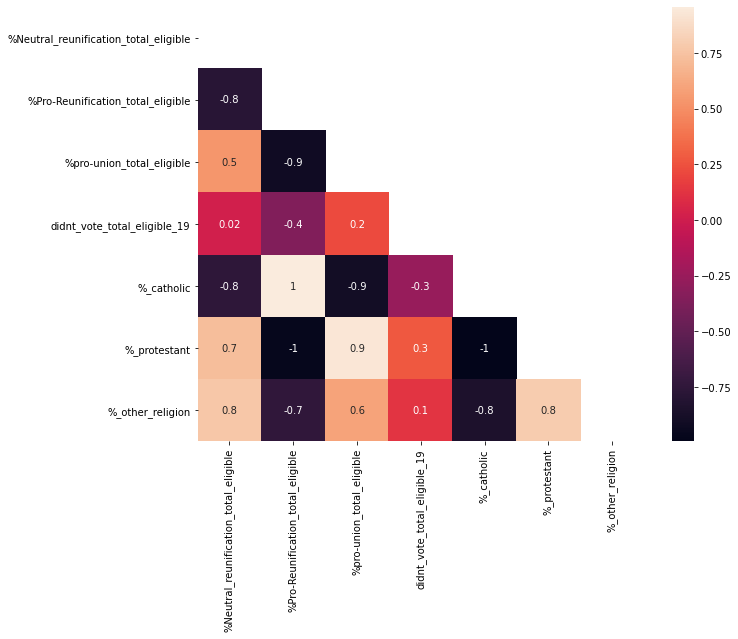

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1g')
plt.show()

### Possible Conclusions of Religion v Party Supporting/Against/Neutral Reunification
* Electorates with a higher % of Protestants(0.7) and Other Religion(0.8) were more likely to have a higher % vote for a NEUTRAL party. 
* By contrast an electorate with a higher % of Catholics (-0.8) was likely to have a lower Neutral vote share.
* Electorates with a higher % of Catholics (1.0) had perfect correlation with electorates that had a higher % of votes for pro reunification parties. 
* Conversely Protestants(-1.0) had perfect inverse correlation to the % voting for reunification, whereas Other had a strong tendency against (-0.7) as well.
* Electorates with a higher % of Protestants(0.9) and Other Religion (0.6) were more likely to have a higher % voting for pro-union parties. 
* Conversely electorates with more Catholics(-0.9) had a strong tendency to have lower votes for pro-union parties. 

* The one real surprise here in contrast with the comparison to Brexit Electorates with more Protestants(0.3) and Other Religion(0.1) were more likely to have a higher % of people not voting, although not by strong margins. 

# Conclusions

* There is a correlation between Catholic - Remain, Protestant - Leave
* Likewise there is a correlation between Catholic - Pro Reunification, Protestant - Pro Union
* Where there are more Protestants, there are more Other religion identifiers
* The swap in correlation for those who didn't vote in Brexit versus those who didn't vote in the General Election 2019, could imply that Catholic / Pro Reunification communities are becoming more engaged as Brexit has changed the political landscape. Although it is hard to know more without observing more data. 